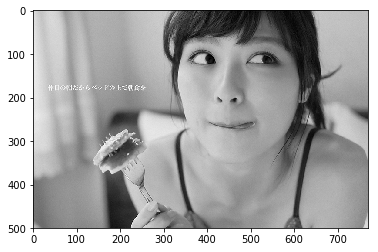

In [73]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('echirio.jpg',0)
high,wide = img.shape
plt.imshow(img,cmap = "gray")
plt.show()

## nearest neighbor(最近傍補完)

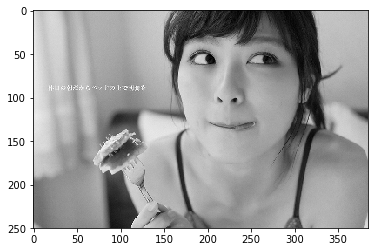

(250, 385)


In [74]:
n = 0.5
nhigh = int(high * n)
nwide = int(wide * n)
near = np.zeros((nhigh,nwide))

for i in range(nhigh):
    di = int(i / n)
    for j in range(nwide):
        dj = int(j / n)
        near[i,j] = img[di,dj]

plt.imshow(near,cmap = "gray")
plt.show()

print(near.shape)

## bilinear (双１次補完)

[[214 214 216 ... 183 184 184]
 [224 221 216 ... 191 190 190]
 [224 223 217 ... 186 191 191]
 ...
 [190 186 186 ... 217 218 218]
 [190 188 188 ... 216 217 217]
 [190 188 188 ... 216 217 217]]


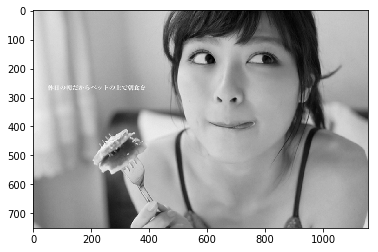

(750, 1155)


In [75]:
"""
bn = 1.5   
img2 = img 
img2 = np.insert(img2,high,img2[high-1,],axis=0)
img2 = np.insert(img2,wide,img2[:,wide-1],axis=1)

bnhigh = int(high * bn)
bnwide = int(wide * bn)
bili = np.zeros((bnhigh,bnwide))

print(img2)

for i in range(bnhigh):
    bi = i / bn
    for j in range(bnwide):
        bj = j / bn
        a = np.sqrt((i-bi)**2 + (j-bj)**2)
        b = np.sqrt((i+1-bi)**2 + (j-bj)**2)
        c = np.sqrt((i-bi)**2 + (j+1-bj)**2)
        d = np.sqrt((i+1-bi)**2 + (j+1-bj)**2)
        sum = a + b + c + d
        da = d / sum 
        db = c / sum
        dc = b / sum
        dd = a / sum
        bni = int(bi)
        bnj = int(bj)
        bili[i,j] = (da * img2[bni,bnj])  + (db * img2[bni+1,bnj]) + (dc * img2[bni,bnj+1]) + (dd * img2[bni+1,bnj+1])
        
plt.imshow(bili,cmap = "gray")
plt.show()

print(bili.shape)
"""

## プロトタイプ

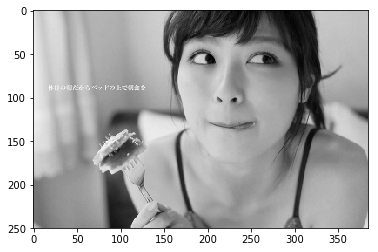

(250, 385)


In [88]:
bn = 0.5   
img2 = img 
img2 = np.insert(img2,high,img2[high-1,],axis=0)
img2 = np.insert(img2,wide,img2[:,wide-1],axis=1)

bnhigh = int(high * bn)
bnwide = int(wide * bn)
bili = np.zeros((bnhigh,bnwide))
dis,w = np.zeros((2,2))

for i in range(bnhigh):
    bi = i / bn
    bni = int(bi)
    for j in range(bnwide):
        bj = j / bn
        bnj = int(bj)
        dis = np.zeros((2,2))
        w = np.zeros((2,2))
        d = 0
        for x in range(2):
            for y in range(2):
                dis[x,y] = np.sqrt((i+x-bi)**2 + (j+y-bj)**2)
                d += dis[x,y] 
        for x in range(2):
            for y in range(2):        
                w[x,y] = dis[1-x,1-y] / d
                bili[i,j] += w[x,y] * img2[bni+x,bnj+y] 


plt.imshow(bili,cmap = "gray")
plt.show()

cv2.imwrite("echiriomini.jpg",bili)

print(bili.shape)